Instalando biblioteca que não tem no Collab

In [ ]:
pip install util-gfsilveira

Importação de Bibliotecas

In [ ]:
import os #organizador de pasta
import numpy as np #estruturação dos dados
import matplotlib.pyplot as plt #plot gráfico
import seaborn as sns #plot gráfico
from PIL import Image #visualização de img
import pandas as pd #estruturação dos dados
from util import meus_uteis, timeProcess
import joblib #convertendo imagens em valores numéricos .gz

Salvando essas pastas de imagens em formato de pastas em formato de comando linux.

In [ ]:
!apt-get install tree

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  tree
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 47.9 kB of archives.
After this operation, 116 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tree amd64 2.0.2-1 [47.9 kB]
Fetched 47.9 kB in 0s (140 kB/s)
Selecting previously unselected package tree.
(Reading database ... 121918 files and directories currently installed.)
Preparing to unpack .../tree_2.0.2-1_amd64.deb ...
Unpacking tree (2.0.2-1) ...
Setting up tree (2.0.2-1) ...
Processing triggers for man-db (2.10.2-1) ...


Carregando a lista de imagens:

In [ ]:
!tree ./drive/MyDrive/teste/imagem_conjunto/ -af >> estrutura_diretorio_Eloiza_25_01_24.txt

In [ ]:
#!cat /content/estrutura_diretorio_Eloiza_25_01_24.txt

Função criada para "limpar" símbolos da lista

In [ ]:
def limpa_lista_img(path_img: str) -> str:
    path_img = path_img.replace("│\xa0\xa0", "")
    path_img = path_img.replace("├──", "")
    path_img = path_img.replace("└──", "")
    path_img = path_img.replace("\n", "")
    path_img = path_img.strip()
 #   path_img = path_img.replace("./", "./data/")
    return path_img

Abrindo os arquivos:

In [ ]:
#abrindo o arquivo:
with open("/content/drive/MyDrive/teste/estrutura_diretorio_Eloiza_25_01_24.txt", "r") as file:
    lista_arquivos = file.readlines()
lista_arquivos = [limpa_lista_img(i) for i in lista_arquivos if ".tif" in i] #laço para chamar os arquivos em formato tif
#lista_arquivos #listando os 3 primeiros arquivos
len(lista_arquivos)

561

#Chamando apenas as imagens dentro do GTS CHO-745:

In [ ]:
#Filtrando as imagens GTS CHO 745
lista_arquivos_gst = [i for i in lista_arquivos if "/CHO-745/GTS/" in i]
lista_arquivos_fluo = [i for i in lista_arquivos_gst if "ch01.tif" in i]

#lista_arquivos_fluo[:3]
len(lista_arquivos_fluo)

21

Abrindo a primeira imagem de GTS CHO 745:

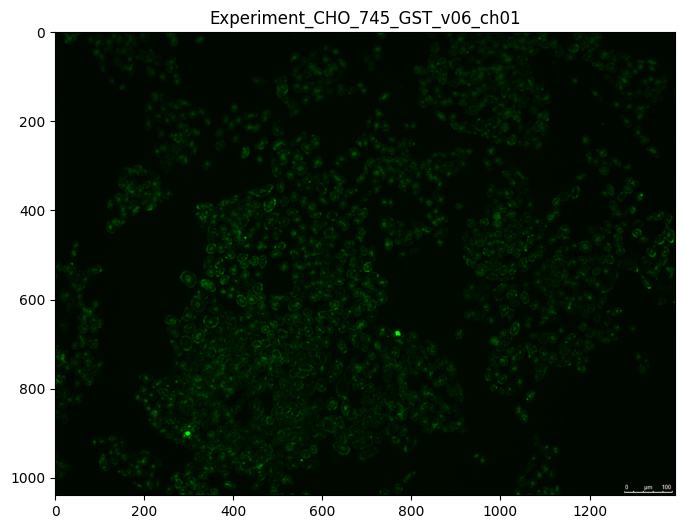

In [ ]:
path = lista_arquivos_fluo[15] #chamando a primeira imagem
img = Image.open(path) #abrinado a primeira imagem

plt.figure(figsize=(8,8)) #tamanho da imagem
plt.imshow(img) #abrindo a imagem
plt.title(path[50:-4]) #título recortando o nome do título que corresponde o caminho da imagem[50:-4]
plt.show()

Convertendo a imagem escolhida para um DataFrame

In [ ]:
#definindo uma função que converte as imagens em matriz numpy
def img_to_df(img) -> pd.DataFrame:
  img_array = np.array(img, dtype="float64")/255 #organizando o tamanho da matriz
  img_df = pd.DataFrame(columns=["red"], data=img_array[:,:,0].reshape(-1,1)) #aqui a cor vermelha da imagem foi anulada e os valores entraram como zero na coluna da df
  img_df["green"] = img_array[:,:,1].reshape(-1,1) # mantendo apenas a camada verde (de interesse)
  img_df["blue"] = img_array[:,:,2].reshape(-1,1) #mesma coisa que foi feita na camada vermelha foi feita com a azul

  return img_df

In [ ]:
img_df_first = img_to_df(img=img) #chamando a função criada e como parâmetro está sendo passado a imagem organizada na pasta lá em cima.
img_df_first.head()

,red,green,blue
0,0.0,0.031373,0.0
1,0.0,0.027451,0.0
2,0.0,0.023529,0.0
3,0.0,0.031373,0.0
4,0.0,0.031373,0.0


#Dataframe com as imagens e valores originais

In [ ]:
img_df_orig = pd.DataFrame() #criando uma df
img_dict = {} #criando um dicionário
for path in lista_arquivos_fluo:  #laço para pasta o que tiver em lista de arquivos controle
  img = Image.open(path)              #abrinado a imagem que contem em path
  img_df_modif = img_to_df(img=img) #retirando os outliers dos dados da df

  img_df_orig[path[61:-4]] = img_df_modif['green'] #renomeando a coluna com o final do nome do ar arquivo e sustituindo a coluna green

  img_dict[path[61:-4]] = img_df_modif

img_df_orig.head()

,CHO_745_GST_anti_v01_ch01,CHO_745_GST_anti_v02_ch01,CHO_745_GST_anti_v03_ch01,CHO_745_GST_anti_v04_ch01,CHO_745_GST_anti_v05_ch01,CHO_745_GST_anti_v06_ch01,CHO_745_GST_anti_v07_ch01,CHO_745_GST_anti_v08_ch01,CHO_745_GST_anti_v10_ch01,CHO_745_GST_anti_v9_ch01,...,CHO_745_GST_v02_ch01,CHO_745_GST_v03_ch01,CHO_745_GST_v04_ch01,CHO_745_GST_v05_ch01,CHO_745_GST_v06_ch01,CHO_745_GST_v07_ch01,CHO_745_GST_v08_ch01,CHO_745_GST_v09_ch01,CHO_745_GST_v10_ch01,CHO_745_GST_v11_ch01
0,0.027451,0.047059,0.027451,0.023529,0.027451,0.027451,0.023529,0.027451,0.027451,0.023529,...,0.027451,0.027451,0.027451,0.023529,0.031373,0.019608,0.023529,0.117647,0.023529,0.023529
1,0.035294,0.050980,0.027451,0.027451,0.023529,0.031373,0.027451,0.023529,0.019608,0.023529,...,0.023529,0.023529,0.027451,0.027451,0.027451,0.019608,0.027451,0.109804,0.023529,0.023529
2,0.027451,0.054902,0.027451,0.027451,0.027451,0.031373,0.023529,0.023529,0.023529,0.027451,...,0.027451,0.023529,0.027451,0.023529,0.023529,0.023529,0.027451,0.105882,0.023529,0.027451
3,0.027451,0.047059,0.023529,0.027451,0.027451,0.023529,0.027451,0.027451,0.023529,0.023529,...,0.023529,0.027451,0.027451,0.027451,0.031373,0.023529,0.031373,0.109804,0.027451,0.023529
4,0.031373,0.047059,0.027451,0.023529,0.027451,0.027451,0.027451,0.023529,0.027451,0.023529,...,0.027451,0.027451,0.031373,0.023529,0.031373,0.019608,0.031373,0.113725,0.023529,0.027451


Salvando a df de imagens originais

In [ ]:
data = timeProcess()[1]
joblib.dump(pd.DataFrame(img_df_orig), '/content/drive/MyDrive/teste/DataFrames pastas/DataFrames_retirada_porcentagens/Original_dataframe-CHO745-GST-fluorescente-'+data+'.gz')

['/content/drive/MyDrive/teste/DataFrames pastas/DataFrames_retirada_porcentagens/Original_dataframe-CHO745-GST-fluorescente-2024-6-4.gz']

#Criando uma função para retirada do excesso de intensidade do pixel encontrados nas imagens:

Esse código foi criada para Calcular a frequencia em qu os pixels estão presentes na imagem. Quanto mais próximo o pixel esta de 1.0, vai verde é esse ponto e é o que precisa ser corrigido na imagem.

In [ ]:
img_df_green = img_df_first['green'].copy() #copiando apenas a coluna verde da df original
freq = img_df_green.value_counts(normalize=True).to_frame().reset_index().sort_values('green', ascending=False)
#Acima: foi calculado a frequencia dos pixels na camada verde, convertido essa serie em DF, resetado index e organizado do maior para menor valor de pixel
freq

,green,proportion
65,1.000000,3.267297e-04
223,0.996078,6.907604e-07
209,0.992157,6.907604e-07
203,0.988235,6.907604e-07
226,0.980392,6.907604e-07
...,...,...
2,0.027451,1.341947e-01
13,0.023529,1.936409e-02
66,0.019608,3.101514e-04
191,0.015686,1.381521e-06


In [ ]:
#somando os valores para ferificar se ele chegou ao valor 1.0
freq.sum()

green         108.058824
proportion      1.000000
dtype: float64

Retirando 5% da frequencia dos valores mais altos que representam a cor verde na imagem. O laço percorre do 1.0 até chegar no valor 0.05 (5%) e finaliza no valor de pixel que deve ser filtrado os valores acima ou igual a 0.05 para reduzir a intensidade de verde.

In [ ]:
soma = 0 #igualando a variavel a 0
for n in range(len(freq)): #iteração para percorrer na df e somar os valores da coluna 1
  soma += freq.iloc[n,1]
  if soma >= 0.001: #5% dos dados
    print(soma)
    break
print(freq.iloc[n,:])

0.001013345490716181
green         0.427451
proportion    0.000023
Name: 110, dtype: float64


In [ ]:
#criando cópia da df original e filtrando os valores da nova df
img_df_second = img_df_first.copy()

In [ ]:
#FIZ ESSE CÓDIGO, MAS NA SEQUENCIA CRIEI UMA FUNÇÃO PRA USAR LA PRA FRENTE

#novo_valor = 0.0  # converter os valores em zero
#img_df_second.loc[img_df_second['green'] >= 0.427451, 'green'] = novo_valor


In [ ]:
#Criando função pra que receba uma df, indique qual coluna usar, o valor a ser alterado e o novo valor
def filter_and_replace(dataframe, column_name, threshold, new_value):
    """
    Filtra os valores da coluna especificada na DataFrame que sejam maiores ou iguais ao limite
    especificado e substitui-os pelo novo valor.

    Args:
        dataframe (pandas.DataFrame): A DataFrame a ser filtrada e modificada.
        column_name (str): O nome da coluna que será filtrada e modificada.
        threshold (float): O valor limite para o filtro.
        new_value (float): O novo valor a ser atribuído aos valores filtrados.

    Returns:
        pandas.DataFrame: A DataFrame modificada.
    """
    dataframe.loc[dataframe[column_name] >= threshold, column_name] = new_value
    return dataframe

In [ ]:
novo_valor = 0.0
img_df_second_filtrada = filter_and_replace(img_df_second, 'green', 0.427451, novo_valor)
img_df_second_filtrada

,red,green,blue
0,0.0,0.031373,0.0
1,0.0,0.027451,0.0
2,0.0,0.023529,0.0
3,0.0,0.031373,0.0
4,0.0,0.031373,0.0
...,...,...,...
1447675,0.0,0.023529,0.0
1447676,0.0,0.023529,0.0
1447677,0.0,0.023529,0.0
1447678,0.0,0.023529,0.0


#Plotando o boxplot com dados originais e retirada de outliers

In [ ]:
def maxplot() -> float:
  if img_df_first.max().max() > img_df_second_filtrada.max().max():
    max = img_df_first.max().max()
  else:
    max = img_df_second_filtrada.max().max()

  max_freq = max/10

  return max + max_freq

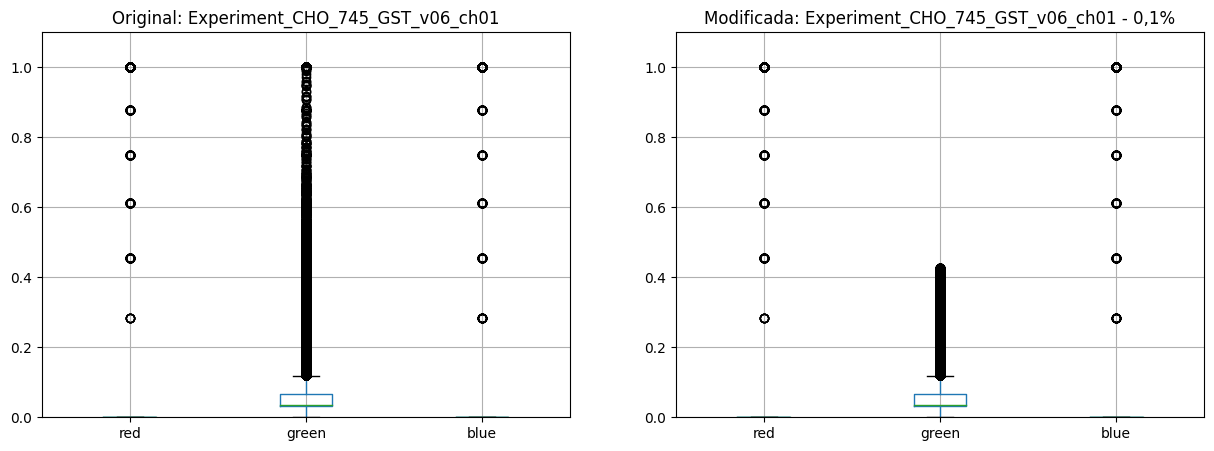

In [ ]:
plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.title(f"Original: {path[50:-4]}")
img_df_first.boxplot()
plt.ylim(0, maxplot())


plt.subplot(1, 2, 2)
plt.title(f"Modificada: {path[50:-4]} - 0,1%")
img_df_second_filtrada.boxplot()
plt.ylim(0, maxplot())

# plt.plot( #função para plotar o gráfico
#     [plot_media, plot_media], #faixa que marca a média
#     c='red' #cor vermelha da faixa
# )
# plt.plot(#função para plotar o gráfico
#     [plot_mediana,plot_mediana],
#     c='green' #cor verde da faixa
# )


plt.show()

#Imagem original e pós nivelado os píxels:

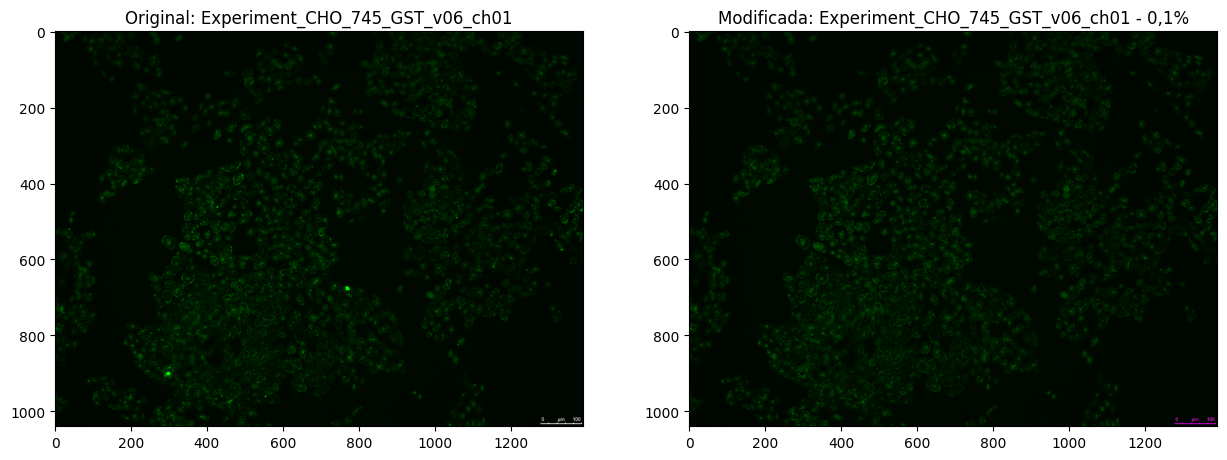

In [ ]:
plt.figure(figsize=(15,15))

plt.subplot(1, 2, 1)
plt.imshow(np.array(img_df_first).reshape(1040, 1392, 3))
plt.title(f"Original: {path[50:-4]}")

plt.subplot(1, 2, 2)
plt.imshow(np.array(img_df_second_filtrada).reshape(1040, 1392, 3))
plt.title(f"Modificada: {path[50:-4]} - 0,1%")

# plt.subplot(1, 2, 3)
# plt.imshow(np.array(img_df_copy).reshape(1040, 1392, 3))
# plt.title(f"Modificada: {path[50:-4]}")
plt.show()

#Dataframe CHO 745 proteína GTS Filtrada:

In [ ]:
img_df_gst = pd.DataFrame() #criando uma df
img_dict = {} #criando um dicionário

for path in lista_arquivos_fluo:  #laço para pasta o que tiver em lista de arquivos controle
  img = Image.open(path)              #abrinado a imagem que contem em path
  teste = filter_and_replace(img_to_df(img=img), 'green', 0.427451, novo_valor)
  img_df_gst[path[61:-4]] = teste['green'] #renomeando a coluna com o final do nome do ar arquivo e sustituindo a coluna green

  img_dict[path[67:-4]] = teste

img_df_gst.head()

,CHO_745_GST_anti_v01_ch01,CHO_745_GST_anti_v02_ch01,CHO_745_GST_anti_v03_ch01,CHO_745_GST_anti_v04_ch01,CHO_745_GST_anti_v05_ch01,CHO_745_GST_anti_v06_ch01,CHO_745_GST_anti_v07_ch01,CHO_745_GST_anti_v08_ch01,CHO_745_GST_anti_v10_ch01,CHO_745_GST_anti_v9_ch01,...,CHO_745_GST_v02_ch01,CHO_745_GST_v03_ch01,CHO_745_GST_v04_ch01,CHO_745_GST_v05_ch01,CHO_745_GST_v06_ch01,CHO_745_GST_v07_ch01,CHO_745_GST_v08_ch01,CHO_745_GST_v09_ch01,CHO_745_GST_v10_ch01,CHO_745_GST_v11_ch01
0,0.027451,0.047059,0.027451,0.023529,0.027451,0.027451,0.023529,0.027451,0.027451,0.023529,...,0.027451,0.027451,0.027451,0.023529,0.031373,0.019608,0.023529,0.117647,0.023529,0.023529
1,0.035294,0.050980,0.027451,0.027451,0.023529,0.031373,0.027451,0.023529,0.019608,0.023529,...,0.023529,0.023529,0.027451,0.027451,0.027451,0.019608,0.027451,0.109804,0.023529,0.023529
2,0.027451,0.054902,0.027451,0.027451,0.027451,0.031373,0.023529,0.023529,0.023529,0.027451,...,0.027451,0.023529,0.027451,0.023529,0.023529,0.023529,0.027451,0.105882,0.023529,0.027451
3,0.027451,0.047059,0.023529,0.027451,0.027451,0.023529,0.027451,0.027451,0.023529,0.023529,...,0.023529,0.027451,0.027451,0.027451,0.031373,0.023529,0.031373,0.109804,0.027451,0.023529
4,0.031373,0.047059,0.027451,0.023529,0.027451,0.027451,0.027451,0.023529,0.027451,0.023529,...,0.027451,0.027451,0.031373,0.023529,0.031373,0.019608,0.031373,0.113725,0.023529,0.027451


Salvando a df com os valores filtrados

In [ ]:
#salvando a df:
data = timeProcess()[1]
#joblib.dump(pd.DataFrame(img_df_gst), '/content/drive/MyDrive/teste/DataFrames pastas/DataFrames_retirada_porcentagens/1-dataframe-CHO745-GST-fluorescente-0,1%-'+data+'.gz')